# <div align = center>التّأكّد من سلامة الأوراق النّقديّة

<hr>

# 0. Import Data

In [1]:
import pandas as pan
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.merge import concatenate

In [2]:
data = pan.read_csv('data/money.csv')

In [3]:
data.describe()

,X1,X2,X3,X4,Label1,Label2
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606,0.555394
std,2.842763,5.869047,4.310030,2.101013,0.497103,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000,1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000,1.000000


In [4]:
data.head()

,X1,X2,X3,X4,Label1,Label2
0,-0.025314,-0.17383,-0.11339,1.21980,1,0
1,5.807000,5.00970,-2.23840,0.43878,0,1
2,-2.434900,-9.24970,8.99220,-0.50001,1,0
3,-1.693600,2.78520,-2.18350,-1.92760,1,0
4,0.636550,5.20220,-5.21590,-6.12110,1,0


In [5]:
#training data
X=data.loc[:, ['X1', 'X2', 'X3', 'X4']].values
y=data.loc[:, ["Label1"]].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# 1. Import Dependencies

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [8]:
# input layer
visible = Input(shape=(4))

# first feature extractor
Layer_1A = Dense(units=64, activation='relu')(visible)
Layer_2A = Dense(units=64, activation='relu')(Layer_1A)


Layer_1B = Dense(units=64, activation='relu')(visible)
Layer_2B = Dense(units=64, activation='relu')(Layer_1B)

# merge feature extractors
merge = concatenate([Layer_2A, Layer_2B])

# interpretation layer
Layer_3 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(Layer_3)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           320         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           320         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           4160        dense[0][0]                      
_______________________________________________________________________________________

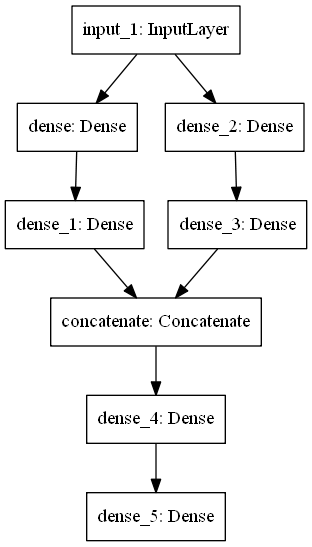

In [9]:
plot_model(model, to_file='shared_input_layer.png')

In [10]:
model.compile(loss='BinaryCrossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [11]:
history = model.fit(X_train, y_train, epochs=250, batch_size=500, verbose=0, validation_split=0.3)

In [12]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

In [13]:
accuracy_score(y_test, y_hat)

0.9970845481049563

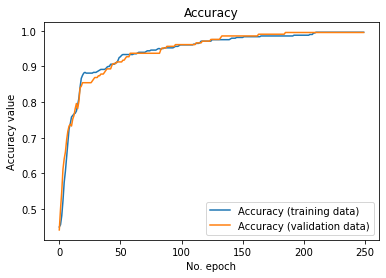

In [14]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

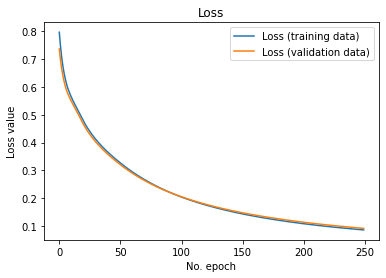

In [15]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

# 4. Saving and Reloading

In [16]:
#model.save('tfmodel')

In [17]:
#del model 

In [18]:
#model = load_model('tfmodel')